In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
def get_class_paths(file_path):
    classes = []
    class_paths = []

    for label in os.listdir(file_path):
        label_path = os.path.join(file_path, label)
        print(label_path)

        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                classes.append(label)
                class_paths.append(image_path)

    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df



In [4]:
train_path = r'D:\RESEARCH 6TH SEM\archive\Training'
test_path = r'D:\RESEARCH 6TH SEM\archive\Testing'
train_df = get_class_paths(train_path)
test_df = get_class_paths(test_path)


D:\RESEARCH 6TH SEM\archive\Training\glioma
D:\RESEARCH 6TH SEM\archive\Training\meningioma
D:\RESEARCH 6TH SEM\archive\Training\notumor
D:\RESEARCH 6TH SEM\archive\Training\pituitary
D:\RESEARCH 6TH SEM\archive\Testing\glioma
D:\RESEARCH 6TH SEM\archive\Testing\meningioma
D:\RESEARCH 6TH SEM\archive\Testing\notumor
D:\RESEARCH 6TH SEM\archive\Testing\pituitary


In [5]:
train_df

,Class Path,Class
0,D:\RESEARCH 6TH SEM\archive\Training\glioma\Tr...,glioma
1,D:\RESEARCH 6TH SEM\archive\Training\glioma\Tr...,glioma
2,D:\RESEARCH 6TH SEM\archive\Training\glioma\Tr...,glioma
3,D:\RESEARCH 6TH SEM\archive\Training\glioma\Tr...,glioma
4,D:\RESEARCH 6TH SEM\archive\Training\glioma\Tr...,glioma
...,...,...
5707,D:\RESEARCH 6TH SEM\archive\Training\pituitary...,pituitary
5708,D:\RESEARCH 6TH SEM\archive\Training\pituitary...,pituitary
5709,D:\RESEARCH 6TH SEM\archive\Training\pituitary...,pituitary
5710,D:\RESEARCH 6TH SEM\archive\Training\pituitary...,pituitary


In [6]:
test_df

,Class Path,Class
0,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
1,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
2,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
3,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
4,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
...,...,...
1306,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary
1307,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary
1308,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary
1309,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary


Text(0.5, 1.0, 'Number of image data points by class (Train)')

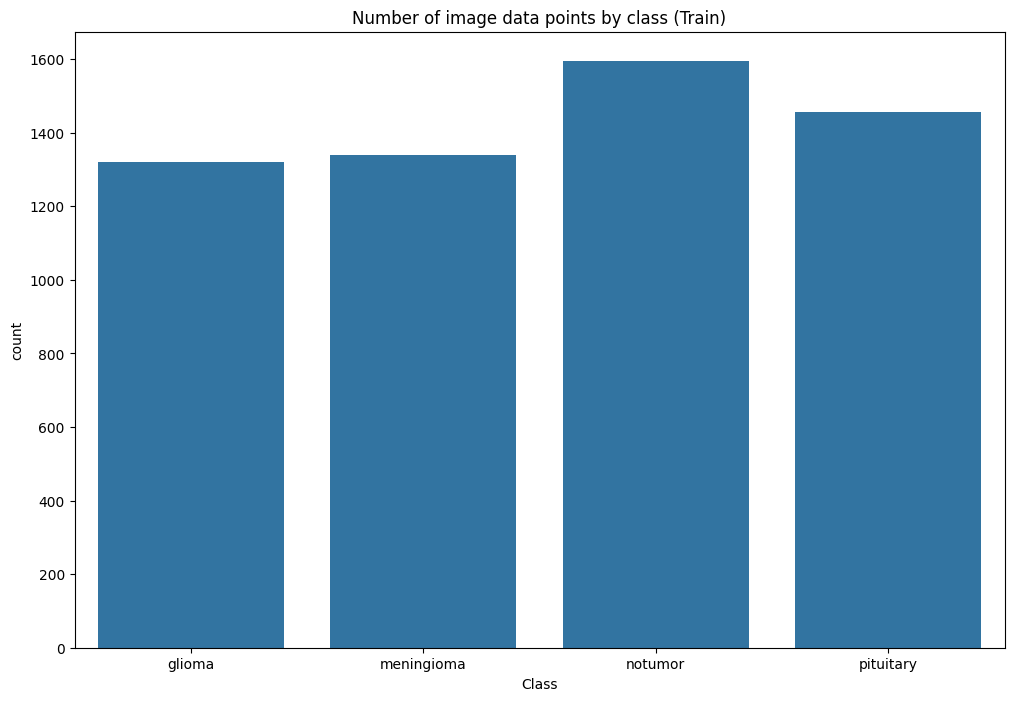

In [7]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=train_df, x=train_df['Class'])
plt.title('Number of image data points by class (Train)')

Text(0.5, 1.0, 'Number of image data points by class (Test)')

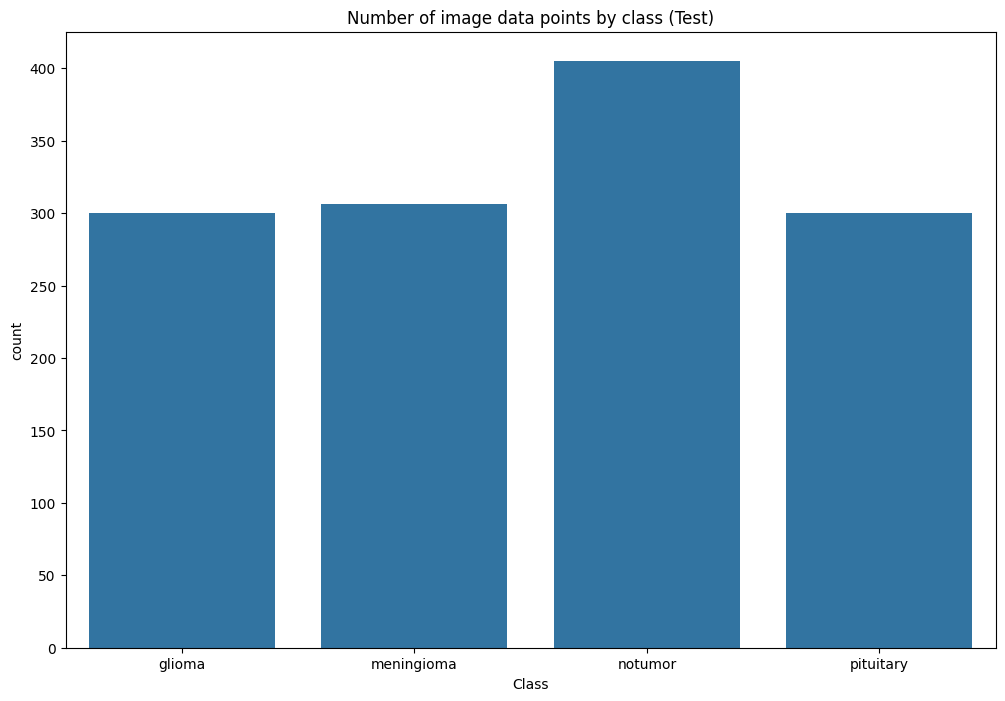

In [8]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=test_df, x=test_df['Class'])
plt.title('Number of image data points by class (Test)')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [10]:
validation_df, testing_df = train_test_split(test_df, train_size=0.5, stratify=test_df['Class'])

In [11]:
 validation_df

,Class Path,Class
1075,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary
149,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
71,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
791,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor
1301,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary
...,...,...
638,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor
1000,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor
664,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor
875,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor


In [12]:
testing_df

,Class Path,Class
1077,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary
157,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
933,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor
572,D:\RESEARCH 6TH SEM\archive\Testing\meningioma...,meningioma
626,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor
...,...,...
1029,D:\RESEARCH 6TH SEM\archive\Testing\pituitary\...,pituitary
78,D:\RESEARCH 6TH SEM\archive\Testing\glioma\Te-...,glioma
835,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor
853,D:\RESEARCH 6TH SEM\archive\Testing\notumor\Te...,notumor


In [13]:
batch_size = 32
test_batch_size = int(batch_size / 2)
image_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

testing_generator = ImageDataGenerator(rescale=1/255)

In [14]:
train_gen = image_generator.flow_from_dataframe(
    train_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

Found 5712 validated image filenames belonging to 4 classes.


In [15]:
validation_gen = image_generator.flow_from_dataframe(
    validation_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

testing_gen = testing_generator.flow_from_dataframe(
    testing_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=test_batch_size,
    target_size=image_size,
    shuffle=False
)


Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


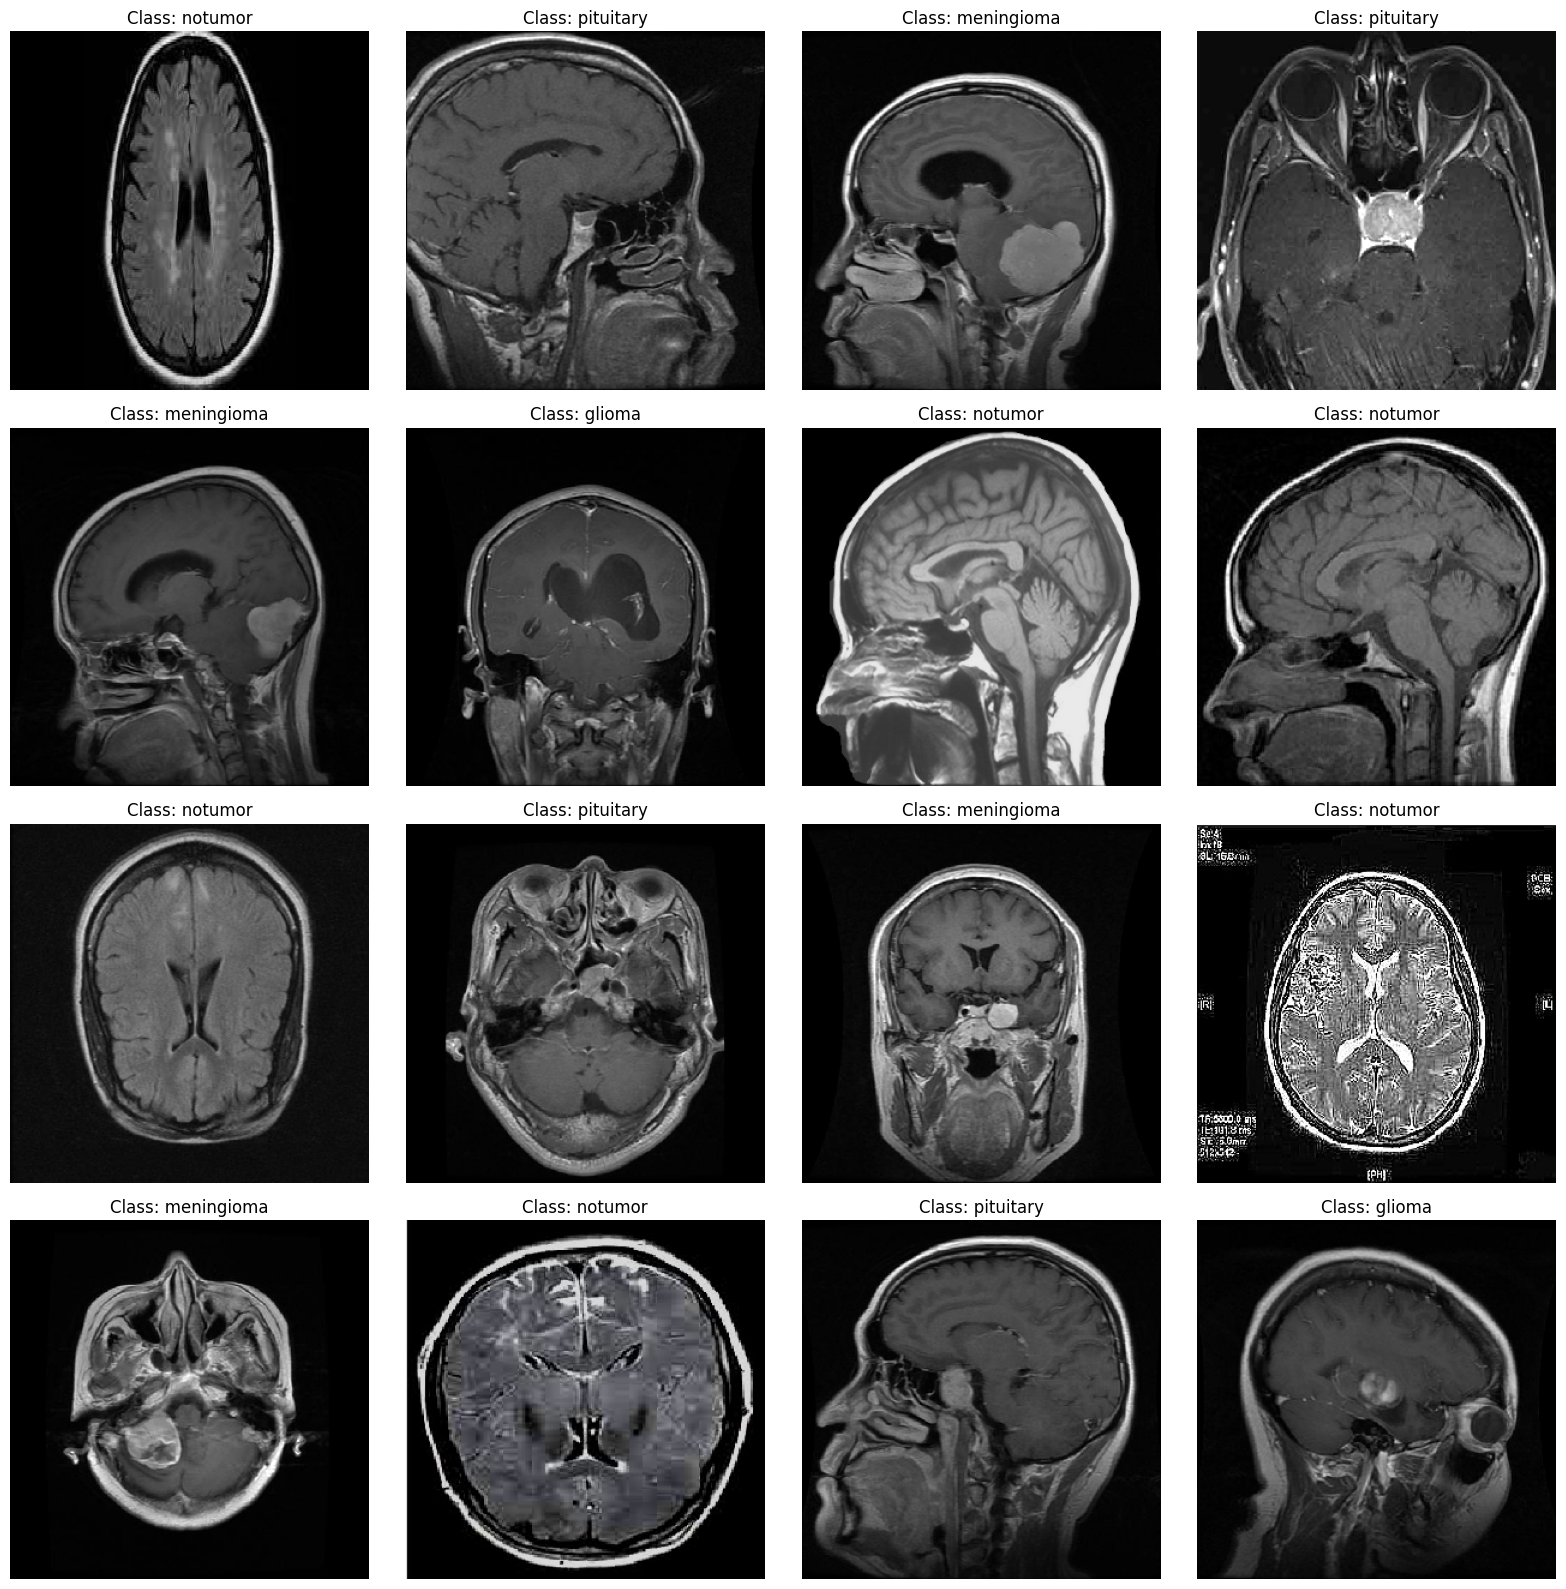

In [16]:

plt.figure(figsize=(16,16))
for idx in range(16):
    plt.subplot(4, 4, idx + 1)
    batch = next(train_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    class_index = np.argmax(label)

    class_names = list(train_gen.class_indices.keys())
    class_indices = list(train_gen.class_indices.values())

    class_index_position = class_indices.index(class_index)

    class_name = class_names[class_index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
image_shape = (299,299,3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=image_shape,
    pooling='max'
)

adapted_model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [18]:
adapted_model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       Precision(),
                       Recall()])

In [ ]:
hist = adapted_model.fit(
    train_gen,
    epochs=4,
    validation_data=validation_gen
)


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4


In [20]:
# Display model summary for documentation
adapted_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,263,750 (241.33 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 42,139,482 (160.75 MB)

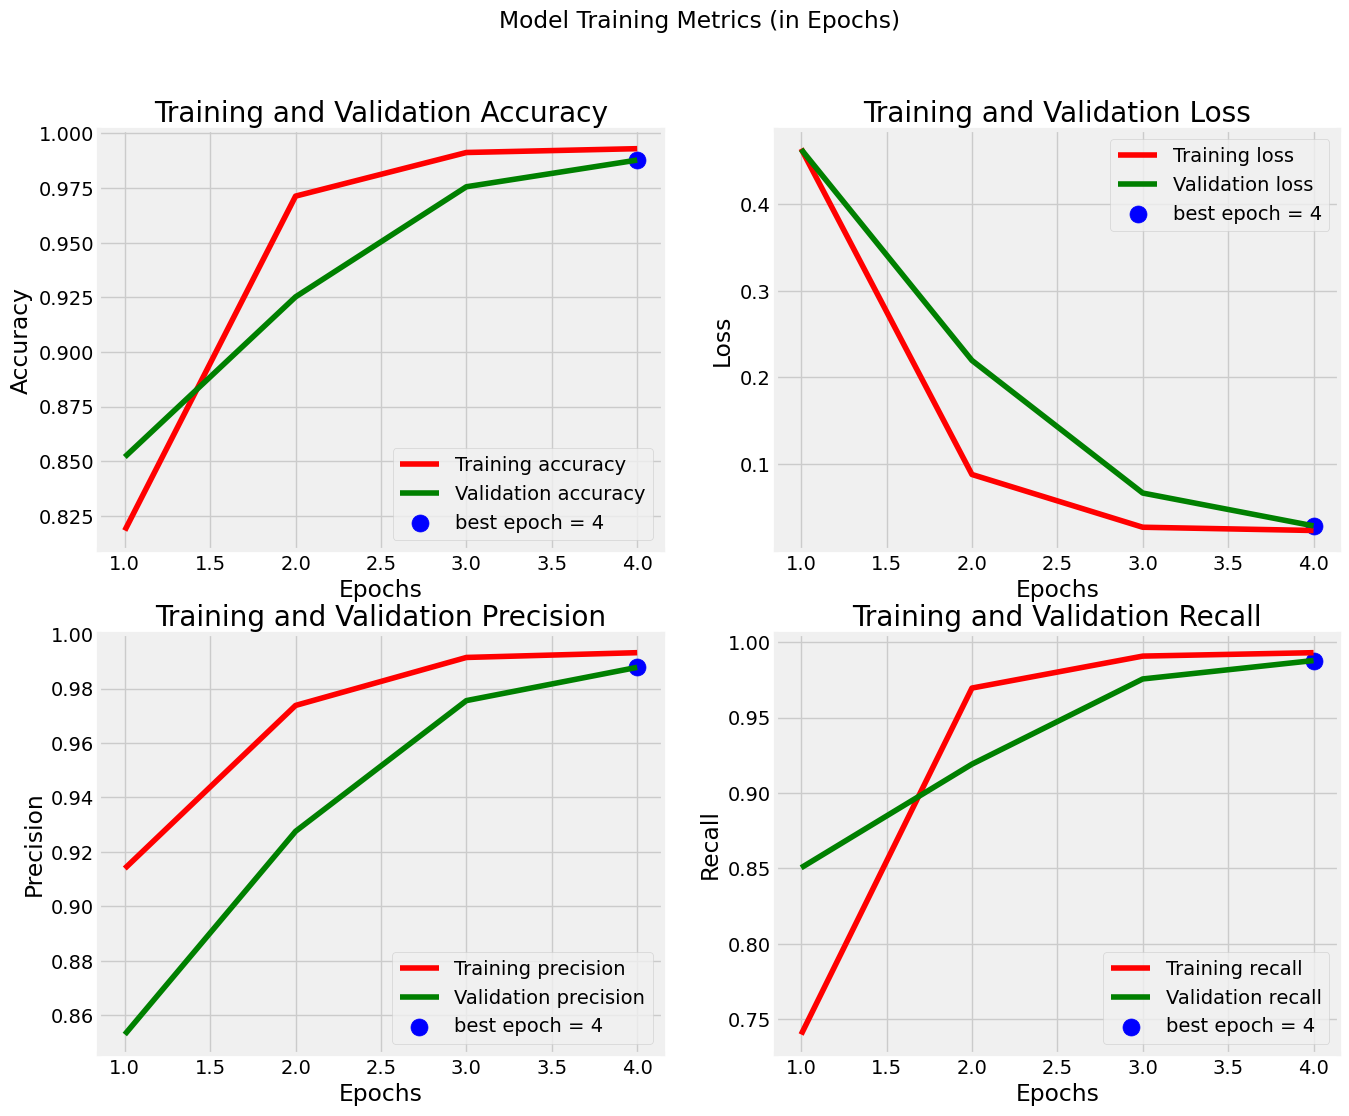

In [21]:
# Getting the training and validation history
metrics = ['accuracy', 'loss', 'precision', 'recall']
train_metrics = {m: hist.history[m] for m in metrics}
validation_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Finding the best epochs and values achieved
best_epochs = {}
best_values = {}

for metric in metrics:
    if metric == 'loss':
        # find the lowest validation loss and store it's index
        idx = np.argmin(validation_metrics[metric])
    else:
        idx = np.argmax(validation_metrics[metric])

    best_epochs[metric] = idx + 1
    best_values[metric] = validation_metrics[metric][idx]


# Plot results
plt.figure(figsize=(16,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(train_metrics[metric]) + 1)

    plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric],
                s=150, c='blue', label=f'best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics (in Epochs)')
plt.show()


In [22]:
# Evaluate model performance on dataset splits - train, test and validation

train_score = adapted_model.evaluate(train_gen, verbose=1)
validation_score = adapted_model.evaluate(validation_gen, verbose=1)
test_score = adapted_model.evaluate(testing_gen, verbose=1)

print(f"Training Accuracy: {train_score[1] * 100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")

print(f"\n\nValidation Accuracy: {validation_score[1] * 100:.2f}%")
print(f"Validation Loss: {validation_score[0]:.4f}")

print(f"\n\nTesting Accuracy: {test_score[1] * 100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9988 - loss: 0.0034 - precision: 0.9988 - recall: 0.9988
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.9917 - loss: 0.0336 - precision: 0.9917 - recall: 0.9917
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9375 - loss: 0.0542 - precision: 0.9375 - recall: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9842 - loss: 0.0287 - precision: 0.9842 - recall: 0.9842
Training Accuracy: 99.88%
Training Loss: 0.0035


Validation Accuracy: 98.93%
Validation Loss: 0.0320


Testing Accuracy: 98.78%
Testing Loss: 0.0363


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step


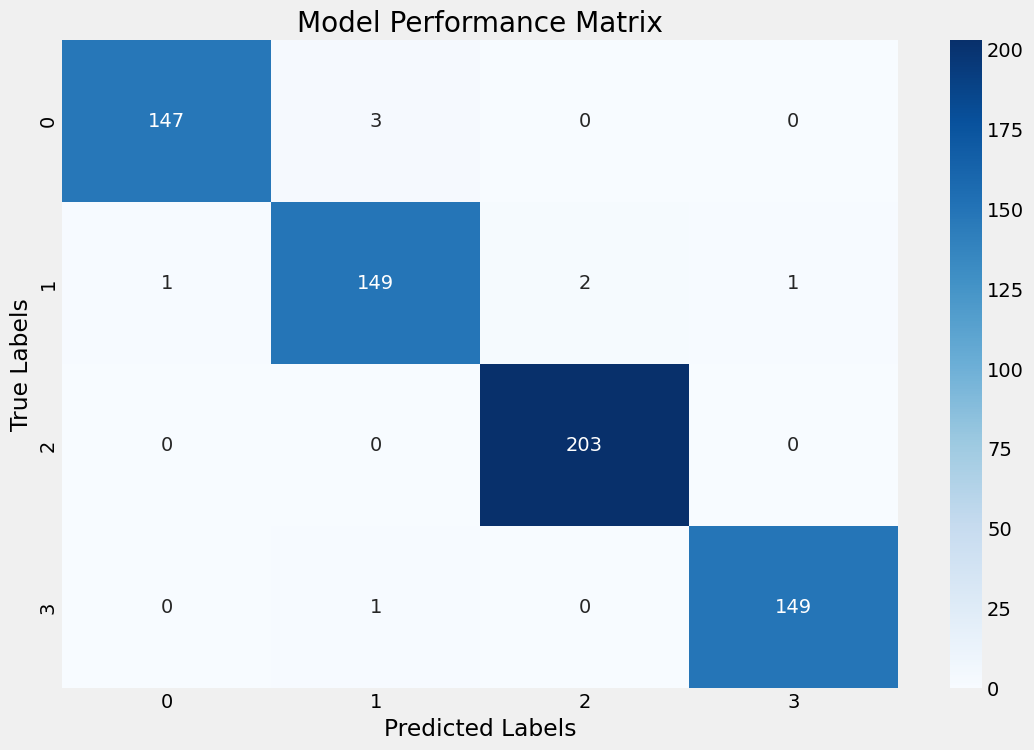

In [23]:
# Create a confusion matrix to investigate the scenarios where the model
# performs best and scenarios where the model could be improved.

preds = adapted_model.predict(testing_gen)
# choose the highest probability class
y_pred = np.argmax(preds, axis=1)

# Map the classes to numerical categories, as the model understands numerical
# class labels.

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Create and display the confusion matrix.

conf_matrix = confusion_matrix(testing_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Model Performance Matrix')
plt.show()


In [24]:
# Define a function to visualize model predictions on new images.

from PIL import Image

def predict(image_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6,8))

    # Load and preprocess input image

    image = Image.open(image_path)
    resized_image = image.resize((299,299))

    image_array = np.asarray(resized_image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0

    # Retrieve model predictions
    predictions = adapted_model.predict(image_array)
    probabilities = list(predictions[0])

    # Retrieve predicted classes
    predicted_class_index = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_index]

    # Plot input image
    plt.subplot(2,1,1)
    plt.imshow(resized_image)
    plt.title(f'Input MRI image \nPredicted class: {predicted_class}')

    # Plot prediction proabilities achieved
    plt.subplot(2,1,2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probabilites", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"Predicted tumor type: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


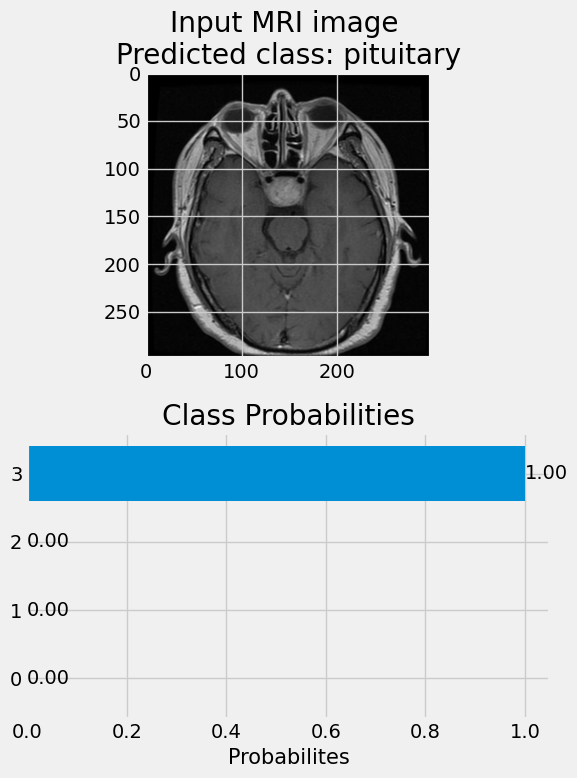

Predicted tumor type: pituitary


In [25]:
# Write test cases.

predict("/content/Testing/pituitary/Te-pi_0042.jpg")

In [26]:
# Save model weights for future utilization.
adapted_model.save_weights('xception_model.weights.h5')

Building a custom CNN Model.

Objectives-
1. Lightweight (Lower # training parameters)
2. Target Accuracy - atleast 90% would be a good start
3. Train on same MRI dataset as Xception Model.
4. Evaluate performance similar to what was done before.


In [27]:
# import necessary libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

In [28]:
# Adjust hyper-parameters and image generators (Reinitializing earlier code.)

# Reduce image size to reduce memory usage during model training
batch_size = 16

image_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

testing_generator = ImageDataGenerator(rescale=1/255)

train_gen = image_generator.flow_from_dataframe(
    train_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

validation_gen = image_generator.flow_from_dataframe(
    validation_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

testing_gen = testing_generator.flow_from_dataframe(
    testing_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=test_batch_size,
    target_size=image_size,
    shuffle=False       # maintain the order for consistent testing procedure.
)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [29]:
custom_model = Sequential()
input_shape = (224,224,3)

# Experiment with adding convolutional layers

# custom_model.add(Conv2D(256, (3,3), padding='same', input_shape=(224,224,3), activation='relu'))
# custom_model.add(BatchNormalization())
# custom_model.add(MaxPooling2D(pool_size=(2,2)))

# 1st Convolutional Layer
custom_model.add(Conv2D(512, (3,3), padding='same', input_shape=input_shape, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Dropout(0.25))

# 2nd Convolutional Layer
custom_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Dropout(0.25))

# 3rd Convolutional Layer
custom_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Dropout(0.25))

# 4th Convolutional Layer
custom_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output for fully connected layers
custom_model.add(Flatten())

# Fully connected layers
custom_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
custom_model.add(Dropout(0.35))

# Add output layer with 4 neurons representative of output classes
custom_model.add(Dense(4, activation='softmax'))

# Compile the model
custom_model.compile(
    Adamax(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', Precision(), Recall()]
)

# Display model summary
custom_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,779,204 (18.23 MB)

 Trainable params: 4,777,412 (18.22 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [31]:
cm_hist = custom_model.fit(
    train_gen,
    epochs=18,
    validation_data=validation_gen
)

Epoch 1/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 392ms/step - accuracy: 0.6271 - loss: 6.5535 - precision_1: 0.6615 - recall_1: 0.5759 - val_accuracy: 0.2382 - val_loss: 5.8256 - val_precision_1: 0.2376 - val_recall_1: 0.2336
Epoch 2/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - accuracy: 0.8066 - loss: 3.0219 - precision_1: 0.8358 - recall_1: 0.7726 - val_accuracy: 0.7740 - val_loss: 2.6274 - val_precision_1: 0.7897 - val_recall_1: 0.7511
Epoch 3/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 122s 340ms/step - accuracy: 0.8552 - loss: 2.1300 - precision_1: 0.8692 - recall_1: 0.8370 - val_accuracy: 0.8366 - val_loss: 1.7141 - val_precision_1: 0.8513 - val_recall_1: 0.8214
Epoch 4/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 119s 333ms/step - accuracy: 0.8855 - loss: 1.5127 - precision_1: 0.8954 - recall_1: 0.8696 - val_accuracy: 0.8351 - val_loss: 1.4367 - val_precision_1: 0.8427 - val_recall_1: 0.8260
Epoch 5/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 334ms/step - accuracy: 0.9035 - loss: 1.0648 - precision_1: 0.9111 

In [32]:
print(f"What's inside: \n{cm_hist.history} \n{cm_hist.history.keys()}", )

What's inside: 
{'accuracy': [0.7128851413726807, 0.819327712059021, 0.8588935732841492, 0.8911064267158508, 0.9101890921592712, 0.9259454011917114, 0.9406512379646301, 0.9480041861534119, 0.9581582546234131, 0.9611344337463379, 0.9683123230934143, 0.9753151535987854, 0.9781162738800049, 0.9830182194709778, 0.9819678068161011, 0.9861694574356079, 0.9870448112487793, 0.9859943985939026], 'loss': [4.586449146270752, 2.7790589332580566, 1.9772800207138062, 1.3936614990234375, 0.9885296821594238, 0.7130196690559387, 0.52284175157547, 0.4079493582248688, 0.3259161114692688, 0.28452637791633606, 0.24531307816505432, 0.20929908752441406, 0.19277170300483704, 0.16879865527153015, 0.16404284536838531, 0.14482413232326508, 0.13626407086849213, 0.1314859539270401], 'precision_1': [0.7555689215660095, 0.8426671624183655, 0.8738181591033936, 0.9021230936050415, 0.916281521320343, 0.9328835010528564, 0.9441893100738525, 0.9516669511795044, 0.9604569673538208, 0.9635819792747498, 0.9697980880737305, 

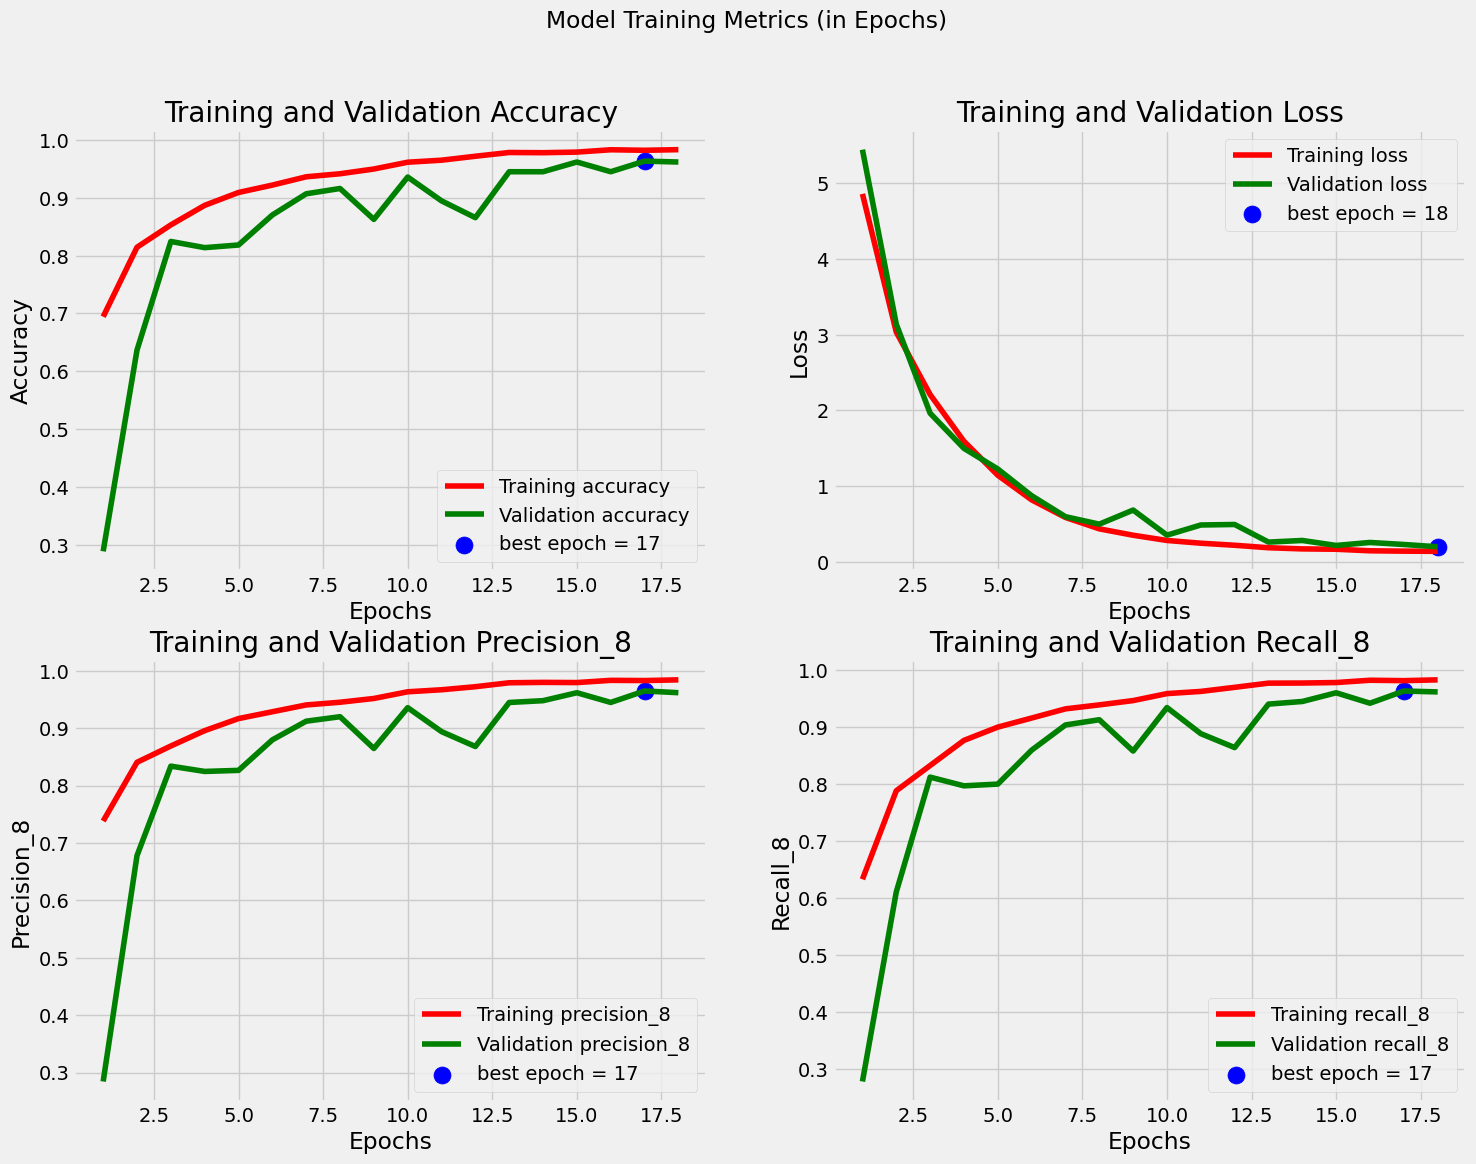

In [72]:
# Getting the training and validation history of our CNN model
# metrics = ['accuracy', 'loss', 'precision_8', 'recall_8']

metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
train_metrics = {m: cm_hist.history[m] for m in metrics}
validation_metrics = {m: cm_hist.history[f'val_{m}'] for m in metrics}

# Finding the best epochs and values achieved
best_epochs = {}
best_values = {}

for metric in metrics:
    if metric == 'loss':
        # find the lowest validation loss and store it's index
        idx = np.argmin(validation_metrics[metric])
    else:
        idx = np.argmax(validation_metrics[metric])

    best_epochs[metric] = idx + 1
    best_values[metric] = validation_metrics[metric][idx]


# Plot results
plt.figure(figsize=(16,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(train_metrics[metric]) + 1)

    plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric],
                s=150, c='blue', label=f'best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics (in Epochs)')
plt.show()


In [63]:
# Evaluate model performance on dataset splits - train, test and validation

train_score = custom_model.evaluate(train_gen, verbose=1)
validation_score = custom_model.evaluate(validation_gen, verbose=1)
test_score = custom_model.evaluate(testing_gen, verbose=1)

print(f"Training Accuracy: {train_score[1] * 100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")

print(f"\n\nValidation Accuracy: {validation_score[1] * 100:.2f}%")
print(f"Validation Loss: {validation_score[0]:.4f}")

print(f"\n\nTesting Accuracy: {test_score[1] * 100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")


357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.9947 - loss: 0.1112 - precision_8: 0.9948 - recall_8: 0.9947
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9546 - loss: 0.2495 - precision_8: 0.9546 - recall_8: 0.9546
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9844 - loss: 0.1798 - precision_8: 0.9844 - recall_8: 0.9844 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9719 - loss: 0.1944 - precision_8: 0.9727 - recall_8: 0.9714
Training Accuracy: 99.53%
Training Loss: 0.1108


Validation Accuracy: 96.34%
Validation Loss: 0.2001


Testing Accuracy: 96.49%
Testing Loss: 0.2071


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


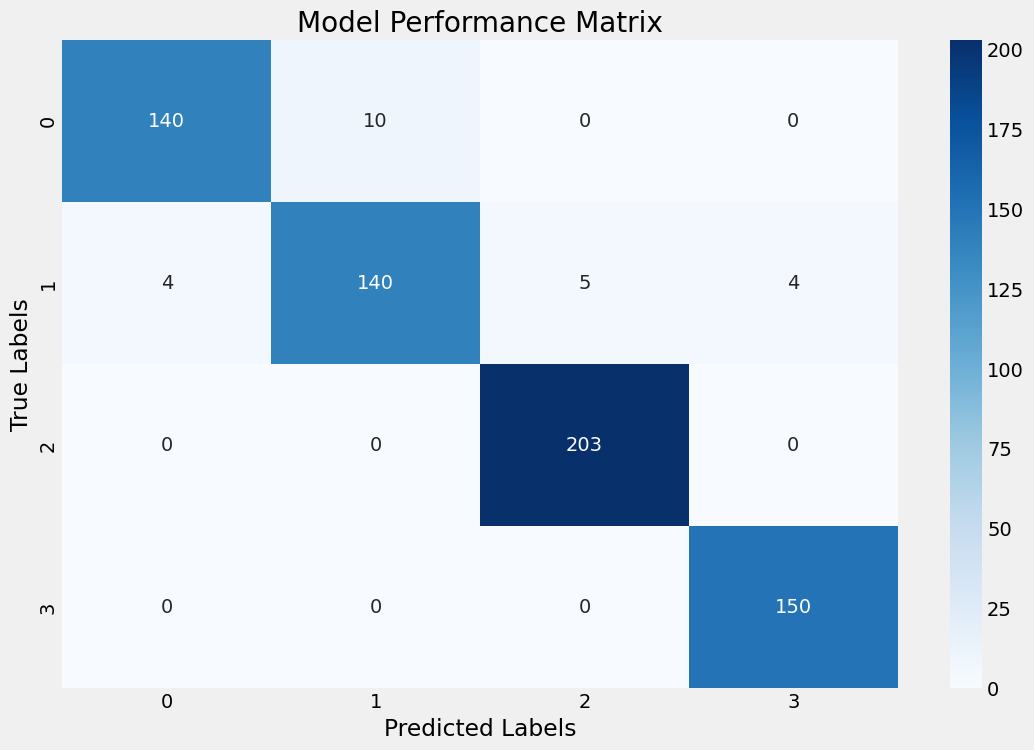

In [64]:
# Create a confusion matrix to investigate the scenarios where the model
# performs best and identify areas of improvement.

preds = custom_model.predict(testing_gen)
# choose the highest probability class
y_pred = np.argmax(preds, axis=1)

# Map the classes to numerical categories, as the model understands numerical
# class labels.

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Create and display the confusion matrix.

conf_matrix = confusion_matrix(testing_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Model Performance Matrix')
plt.show()


In [67]:
# Define a function to visualize custom model predictions on some example images

from PIL import Image

def predict(image_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6,8))

    # Load and preprocess input image

    image = Image.open(image_path)
    resized_image = image.resize((224,224))

    image_array = np.asarray(resized_image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0

    # Retrieve model predictions
    predictions = custom_model.predict(image_array)
    probabilities = list(predictions[0])

    # Retrieve predicted classes
    predicted_class_index = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_index]

    # Plot input image
    plt.subplot(2,1,1)
    plt.imshow(resized_image)
    plt.title(f'Input MRI image \nPredicted class: {predicted_class}')

    # Plot prediction proabilities achieved
    plt.subplot(2,1,2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probabilites", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"Predicted tumor type: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


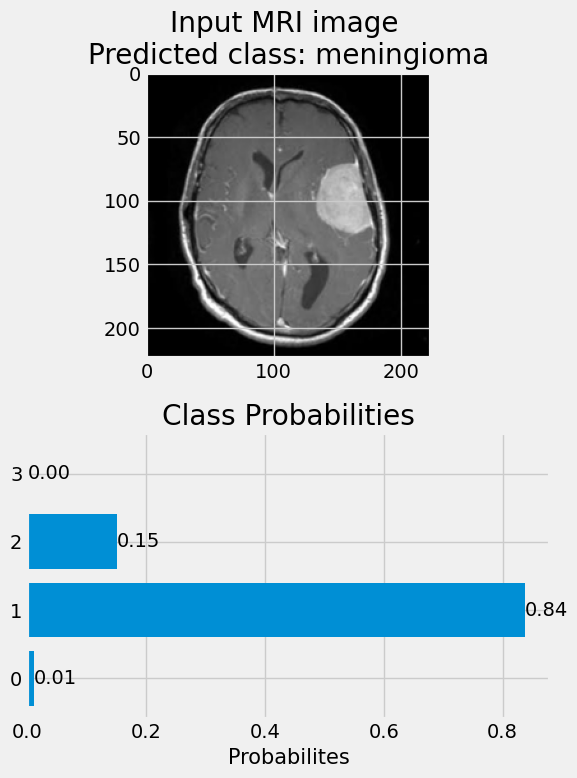

Predicted tumor type: meningioma


In [71]:
# Testing
predict("/content/image.jpg")

In [69]:
# Save model weights for future utilization.
custom_model.save_weights('custom_cnn_model.weights.h5')